In [3]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df = pd.read_csv("data/Miscarriage_Prediction_dataset_New_HA.csv" , sep = ";")

In [4]:
print(f"Total rows: {len(df)}")
print(f"Redundant (duplicate) rows: {df.duplicated().sum()}")

Total rows: 1000000
Redundant (duplicate) rows: 74


In [5]:
df.drop_duplicates(inplace=True)

In [6]:
list(df.columns)

['Age',
 'BMI',
 'Nmisc',
 'Activity',
 'Binking',
 'Walking',
 'Drinving',
 'Sitting',
 'Location',
 'temp',
 'bpm',
 'stress',
 'bp',
 'Alcohol Comsumption',
 'Drunk',
 'Miscarriage/ No Miscarriage']

In [7]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=["Miscarriage/ No Miscarriage"])
y = df["Miscarriage/ No Miscarriage"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y,
    shuffle=True
)

In [ ]:
X_train.head()

,Age,BMI,Nmisc,Activity,Binking,Walking,Drinving,Sitting,Location,temp,bpm,stress,bp,Alcohol Comsumption,Drunk
776931,32,"17,54404608",0,1,0,1,0,1,0,39,157,1,2,248,0
427611,27,"22,25098527",0,1,0,1,0,1,1,39,90,0,1,523,2
391920,27,"17,54404608",3,1,1,0,0,1,2,37,230,3,3,404,2
872768,33,"20,11146746",3,1,0,1,0,1,0,35,162,0,2,167,2
544370,29,"17,11614252",1,1,1,0,0,1,2,39,90,0,1,778,2


In [9]:
# Convert columns to numeric, handling comma decimal separators if necessary
def convert_to_numeric(df):
    for col in df.columns:
        if df[col].dtype == 'object':
            try:
                # Attempt to convert to numeric, replacing comma with period
                df[col] = df[col].str.replace(',', '.', regex=False).astype(float)
            except ValueError:
                # If conversion to float fails, try converting to int
                try:
                    df[col] = df[col].astype(int)
                except ValueError:
                    pass # Keep as is if conversion to both fails
    return df

X_train = convert_to_numeric(X_train.copy())
X_test = convert_to_numeric(X_test.copy())
# y_train is already numeric, no need to convert

In [ ]:
pip install "tabpfn @ git+https://github.com/PriorLabs/TabPFN.git"

  Cloning https://github.com/PriorLabs/TabPFN.git to /tmp/pip-install-8vsvb9zr/tabpfn_5d711f6a097a4653a19c0b1f9762fd7d
  Running command git clone --filter=blob:none --quiet https://github.com/PriorLabs/TabPFN.git /tmp/pip-install-8vsvb9zr/tabpfn_5d711f6a097a4653a19c0b1f9762fd7d
  Resolved https://github.com/PriorLabs/TabPFN.git to commit c4fc6de8fbccf32ae2293631d9a2755985791c30
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.7/138.7 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.7/64.7 kB 6.9 MB/s eta 0:00:00
  Created wheel for tabpfn: filename=tabpfn-2.2.1-py3-none-any.whl size=178517 sha256=c9dedcfc72f43246a76ca2e7719d3633fa41428adf58ba84031688fe658538e5
  Stored in directory: /tmp/pip-ephem-wheel-cache-12qqyu3w/wheels/df/f4/05/8e4d074803d44fdeb5914b7e76831d3938b70128cb9bc93303
Successfully built tabpfn
  Attempting uninstal

In [ ]:
from tabpfn import TabPFNClassifier
import os
# os.environ['CUDA_LAUNCH_BLOCKING'] = '1'


# clf = TabPFNClassifier(device='cuda')  # use 'cuda' for GPU

# clf.fit(X_train.values, y_train.values)

# y_pred = clf.predict(X_test.values)
# accuracy = (y_pred == y_test.values).mean()
# print(f"Accuracy: {accuracy}")

from tabpfn import TabPFNClassifier
import torch

# Check GPU
if not torch.cuda.is_available():
    raise SystemError("No GPU detected. Install CUDA and use an NVIDIA GPU.")

# Use local GPU
model = TabPFNClassifier(device='cuda', random_state=42 , ignore_pretraining_limits=True)
model.fit(X_train.values, y_train.values)


TabPFNClassifier(device='cuda', ignore_pretraining_limits=True, random_state=42)

In [ ]:
#save the trained model
import joblib
joblib.dump(model, 'tabpfn_model.pkl')

['tabpfn_model.pkl']

In [ ]:
model.to("cpu")

AttributeError: 'TabPFNClassifier' object has no attribute 'to'

In [ ]:
y_pred = model.predict(X_test.values)
accuracy = (y_pred == y_test.values).mean()
print(f"Accuracy: {accuracy}")

AcceleratorError: CUDA error: invalid configuration argument
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


In [ ]:
pip install tabpfn-client


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 15.6 MB/s eta 0:00:00


In [ ]:
X_train = X_train[:5000]
y_train = y_train[:5000]

In [ ]:
from tabpfn_client import TabPFNClassifier
model = TabPFNClassifier()
model.fit(X_train, y_train)  # computation happens on TabPFN server


TabPFNClassifier()

In [ ]:
X_test = X_test[:500]
y_test = y_test[:500]

In [ ]:
predictions = model.predict(X_test)
accuracy = (predictions == y_test).mean()
print(f"Accuracy: {accuracy}")

Processing: 100%|██████████| [00:03<00:00]

Accuracy: 0.84


In [ ]:
print(f"Accuracy: {accuracy}")

Accuracy: 0.84


In [ ]:
# add SHAP to trained model
# SHAP explanation
import shap
explainer = shap.Explainer(model.predict_proba, X_train)
shap_values = explainer(X_test)

# Summary plot
shap.summary_plot(shap_values, X_test)



TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Initialize the XGBoost classifier
xgb_clf = xgb.XGBClassifier(objective='binary:logistic', random_state=42)

# Train the model
xgb_clf.fit(X_train.values, y_train.values)

# Make predictions on the test set
y_pred_xgb = xgb_clf.predict(X_test)

# Evaluate the accuracy
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Accuracy: {accuracy_xgb}")

XGBoost Accuracy: 0.8


In [ ]:
# calaculate train accuracy
from sklearn.metrics import accuracy_score
y_pred_train_xgb = model.predict(X_train)
accuracy_train_xgb = accuracy_score(y_train, y_pred_train_xgb)

Processing: 100%|██████████| [00:05<00:00]


In [ ]:
accuracy_train_xgb

0.8574

Processing: 100%|██████████| [00:03<00:00]


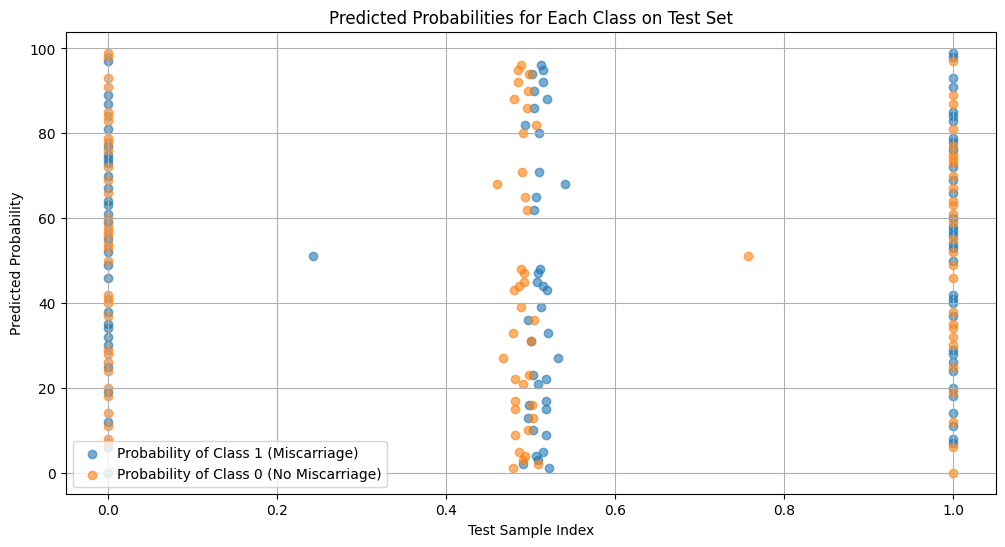

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Get the prediction probabilities for the test set
y_pred_proba = model.predict_proba(X_test)

# Create a scatter plot
plt.figure(figsize=(12, 6))

# Plot probabilities for class 0
plt.scatter(y_pred_proba[:, 1],np.arange(len(y_pred_proba)), label='Probability of Class 1 (Miscarriage)', alpha=0.6)

# Plot probabilities for class 1
plt.scatter(y_pred_proba[:, 0],np.arange(len(y_pred_proba)), label='Probability of Class 0 (No Miscarriage)', alpha=0.6)

plt.title('Predicted Probabilities for Each Class on Test Set')
plt.xlabel('Test Sample Index')
plt.ylabel('Predicted Probability')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pickle

rf_clf = RandomForestClassifier(n_estimators=3, random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf}")
# save the trained Random Forest model
with open('models/random_forest_model_miscarriage.pkl', 'wb') as f:
    pickle.dump(rf_clf, f)

Random Forest Accuracy: 0.7886002020141409


In [15]:
with open('models/random_forest_model_miscarriage.pkl', 'wb') as f:
    pickle.dump(rf_clf, f)